In [1]:
### -----------------------------------------------------------------------------------------------------------###
#                                                                                                                #
#                                     Please Read All the comments ⊂(◉‿◉)                                        #
#                                                                                                                #
###------------------------------------------------------------------------------------------------------------###

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
### -----------------------------------------------------------------------------------------------------------###
#                                            Perfect Binary Data                                                 #
###------------------------------------------------------------------------------------------------------------###

In [4]:
# draw random independent variable values
x = np.arange(0,150)
# set dependent variable values
y = np.zeros(150)
y[:75] = np.ones(75)

# draw random independent variable values
x_test = np.arange(40,110,3)
# set dependent variable values
y_test = np.zeros(24)
y_test[:12] = np.ones(12)

# to see format of the data uncomment line below
# print(x[:10],'\n',y[:10],'\n',x_test[:10],'\n',y_test[:10])

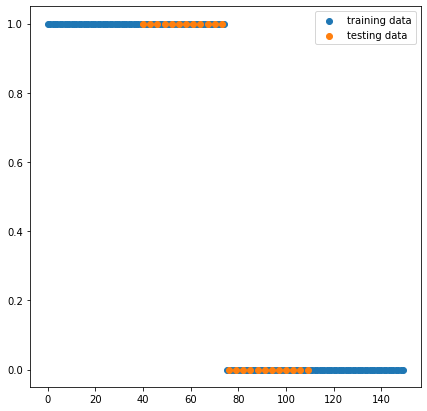

In [5]:
# draw a scatter plot of the x,y and x_test,y_test
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

ax.scatter(np.sort(x),y,label='training data')
ax.scatter(np.sort(x_test),y_test,label='testing data')
plt.legend()

In [6]:
# transorm x to x_train for .fit (so sklearn can process it)
x_train = x[:,np.newaxis]
# to see x_train uncomment line below
# print(x_train)

In [7]:
# fit the model
reg = LogisticRegression()
reg.fit(x_train,y)

# predict labels(like y_test) for features(x_test) 
preds = reg.predict(x_test[:,np.newaxis])

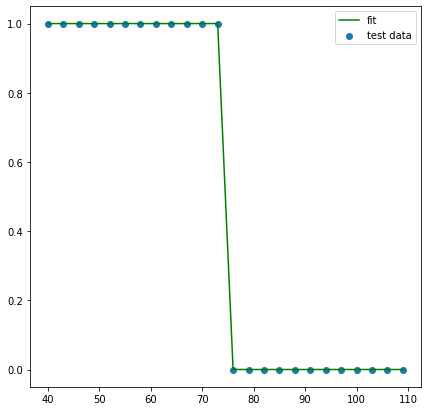

In [8]:
# draw a scatter plot of the x,y and x_test,y_test and predictions (fit line)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

ax.plot(x_test,preds,label='fit',c='green')
# ax.scatter(x,y,label='training data')
ax.scatter(x_test,y_test,label='test data')

plt.legend()

In [9]:
### -----------------------------------------------------------------------------------------------------------###
#                                     Binary Cluster Classification Data                                         #
###------------------------------------------------------------------------------------------------------------###

In [10]:
# Let's create data for 2 iris species (Setosa and Versicolor)
setosa_petal_width = np.random.uniform(0.3,0.8,40)
setosa_petal_length = np.random.uniform(1,2,40)

versicolor_petal_width = np.random.uniform(1,1.6,40)
versicolor_petal_length = np.random.uniform(3,5,40)

# Join data about petal width and length of both Setosa and Versicolor
x_setosa = np.concatenate((setosa_petal_width[:,np.newaxis],setosa_petal_length[:,np.newaxis]),axis=1)
x_versicolor = np.concatenate((versicolor_petal_width[:,np.newaxis],versicolor_petal_length[:,np.newaxis]),axis=1)

# Split data into train and test subsets
X_train = np.concatenate((x_setosa[:30],x_versicolor[:30]))
X_test = np.concatenate((x_setosa[30:],x_versicolor[30:]))

# To see format of the data uncomment lines below
# print(x_setosa,'\n\n', x_versicolor)

# Set dependent variable values
# Since we don't care if data is shuffled, we know that first half
# of our data is setosa iris and the second half is versicolor iris
# Because of that we can just set label 1 for half of the data
# and 0 for the other half (0 - setosa, 1 - versicolor)
y_train = np.zeros(60)
y_train[30:] = np.ones(30)
y_test = np.zeros(20)
y_test[10:] = np.ones(10)

# To see format of the y_train and y_test data uncomment lines below
# print(y_test[:10], '\n\n', y_train[:10])

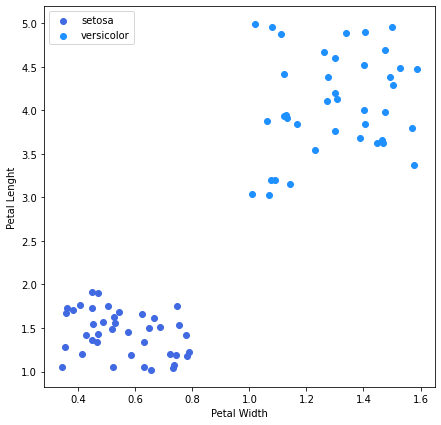

In [11]:
# draw a scatter plot of: 
# Iris Setosa petal width and length
# Iris Versicolor petal width and length

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

ax.scatter(x_setosa[:,0],x_setosa[:,1],label='setosa',c='royalblue')
ax.scatter(x_versicolor[:,0],x_versicolor[:,1],label='versicolor',c='dodgerblue')
plt.xlabel('Petal Width')
plt.ylabel('Petal Lenght')
plt.legend()

In [12]:
# Fit the data to a logistic regression model
# clf stands for classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = 0, 1.7
ymin, ymax = 0.7, 5.2
xd = np.array([xmin, xmax])
yd = m*xd + c

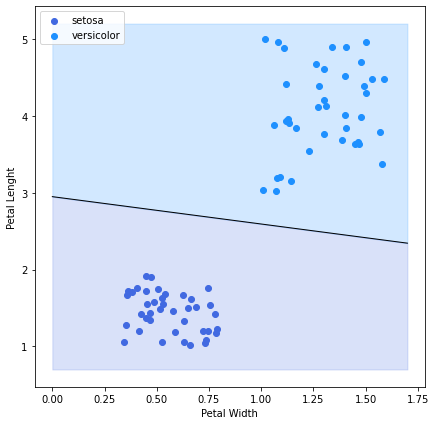

In [14]:
# draw a scatter plot of the x_train,y_train and x_test,y_test, and plot Decision Boundary
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

ax.plot(xd, yd, 'k', lw=1, ls='-')
ax.scatter(x_setosa[:,0],x_setosa[:,1],label='setosa',c='royalblue')
ax.scatter(x_versicolor[:,0],x_versicolor[:,1],label='versicolor',c='dodgerblue')
ax.fill_between(xd, yd, ymin, color='royalblue', alpha=0.2)
ax.fill_between(xd, yd, ymax, color='dodgerblue', alpha=0.2)
plt.xlabel('Petal Width')
plt.ylabel('Petal Lenght')

plt.legend()

In [15]:
### -----------------------------------------------------------------------------------------------------------###
#                                Iris setosa, Iris Versicolor, Iris Virginica                                    #
###------------------------------------------------------------------------------------------------------------###

In [16]:
# This time we'll create data for 3 iris species (Setosa, Versicolor and Virginica)
setosa_petal_width = np.random.uniform(0.3,0.8,40)
setosa_petal_length = np.random.uniform(1,2,40)

versicolor_petal_width = np.random.uniform(1,1.6,40)
versicolor_petal_length = np.random.uniform(3,5,40)

virginica_petal_width = np.random.uniform(1.6,2.5,40)
virginica_petal_length =np.random.uniform(5,7,40)

# Join data about petal width and length of both Setosa and Versicolor
x_setosa = np.concatenate((setosa_petal_width[:,np.newaxis],setosa_petal_length[:,np.newaxis]),axis=1)
x_versicolor = np.concatenate((versicolor_petal_width[:,np.newaxis],versicolor_petal_length[:,np.newaxis]),axis=1)
x_virginica = np.concatenate((virginica_petal_width[:,np.newaxis],virginica_petal_length[:,np.newaxis]),axis=1)

# Split data into train and test subsets
X_train = np.concatenate((x_setosa[:30],x_versicolor[:30]))
X_train = np.concatenate((X_train,x_virginica[:30]))

X_test = np.concatenate((x_setosa[30:],x_versicolor[30:]))
X_test = np.concatenate((X_test,x_virginica[30:]))

# To see format of the data uncomment lines below
# print(x_setosa[:4],'\n\n', x_versicolor[:4], '\n\n', x_virginca[:4])
# print(X_test.shape, X_train.shape, y_test.shape, y_train.shape)

# Set dependent variable values
# Since we don't care if data is shuffled, we know that first half
# of our data is setosa iris and the second half is versicolor iris
# Because of that we can just set label 1 for half of the data
# and 0 for the other half (0 - setosa, 1 - versicolor)
y_train = np.zeros(90)
y_train[30:] = np.ones(60)
y_train[60:]+=1

# line below shows each unique element and number of them in an array
# output should look like: (array([0., 1., 2.]), array([30, 30, 30]))
# print(np.unique(y_train,return_counts=True))
# you can also use this for y_test

y_test = np.zeros(30)
y_test[10:] = np.ones(20)
y_test[20:]+=1


# To see format of the y_train and y_test data uncomment lines below
# print(y_test[:10], '\n\n', y_train[:10])

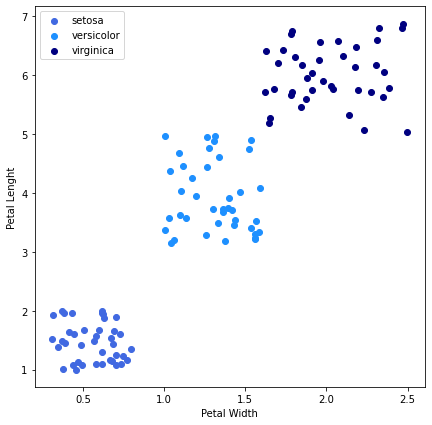

In [17]:
# draw a scatter plot of: 
# Iris Setosa petal width and length
# Iris Versicolor petal width and length
# Iris Virginica petal width and length

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

ax.scatter(x_setosa[:,0],x_setosa[:,1],label='setosa',c='royalblue')
ax.scatter(x_versicolor[:,0],x_versicolor[:,1],label='versicolor',c='dodgerblue')
ax.scatter(x_virginica[:,0],x_virginica[:,1],label='virginica',c='navy')
plt.xlabel('Petal Width')
plt.ylabel('Petal Lenght')
plt.legend()

In [18]:
# Fit the data to a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [19]:
# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
h=0.2
x_min, x_max = 0, 2.6
y_min, y_max = 0, 7.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

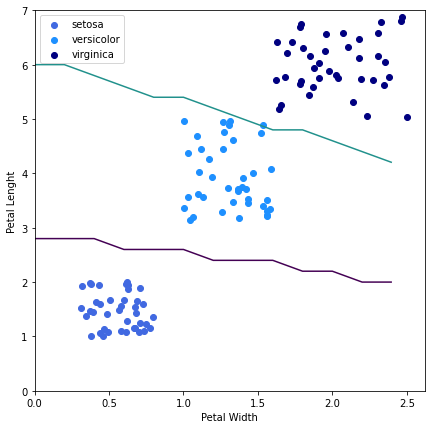

In [20]:
# draw a scatter plot of: 
# Iris Setosa petal width and length
# Iris Versicolor petal width and length
# Iris Virginica petal width and length

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
ax.contour(xx, yy, Z,1)
ax.scatter(x_setosa[:,0],x_setosa[:,1],label='setosa',c='royalblue')
ax.scatter(x_versicolor[:,0],x_versicolor[:,1],label='versicolor',c='dodgerblue')
ax.scatter(x_virginica[:,0],x_virginica[:,1],label='virginica',c='navy')

plt.xlabel('Petal Width')
plt.ylabel('Petal Lenght')
plt.legend()